In [102]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
fandango = pd.read_csv("../06-Capstone-Project/fandango_scrape.csv")

fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [90]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

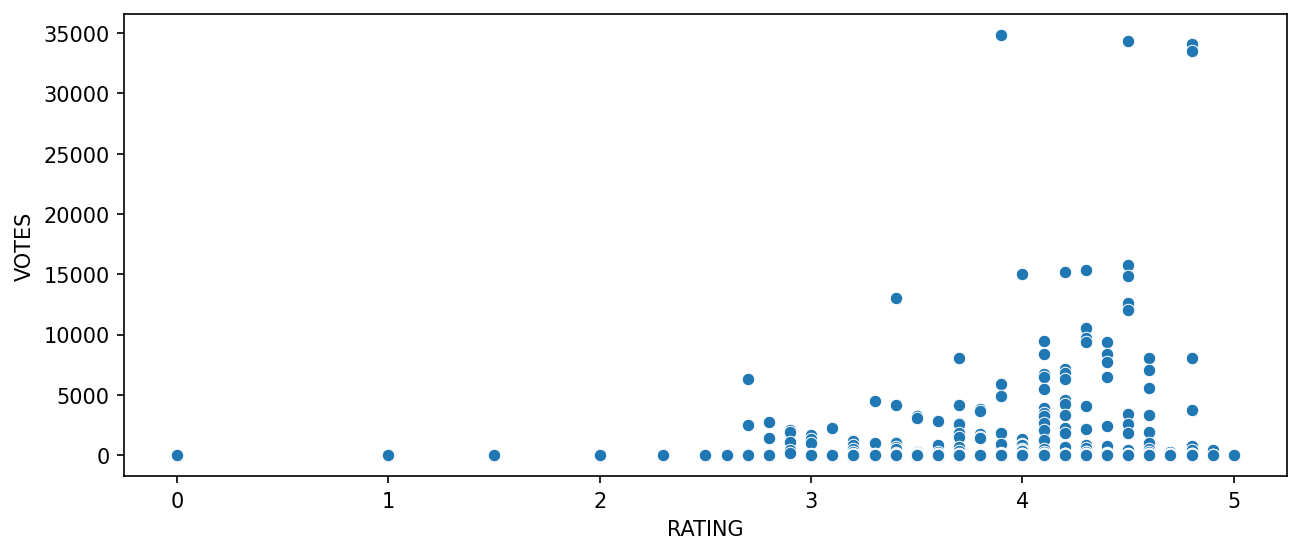

In [91]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x="RATING",y="VOTES",data=fandango)

In [92]:
fandango.select_dtypes(include="number").corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [93]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [94]:
fandango["YEAR"] = fandango["FILM"].apply(lambda title:title.split("(")[-1].replace(")",""))

In [95]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [96]:
fandango["YEAR"] = fandango["YEAR"].astype(int)

In [97]:
type(fandango["YEAR"][0])

numpy.int32

In [98]:
fandango["YEAR"].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

In [99]:
fan_reviewed = fandango[fandango["VOTES"] > 0]

In [100]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


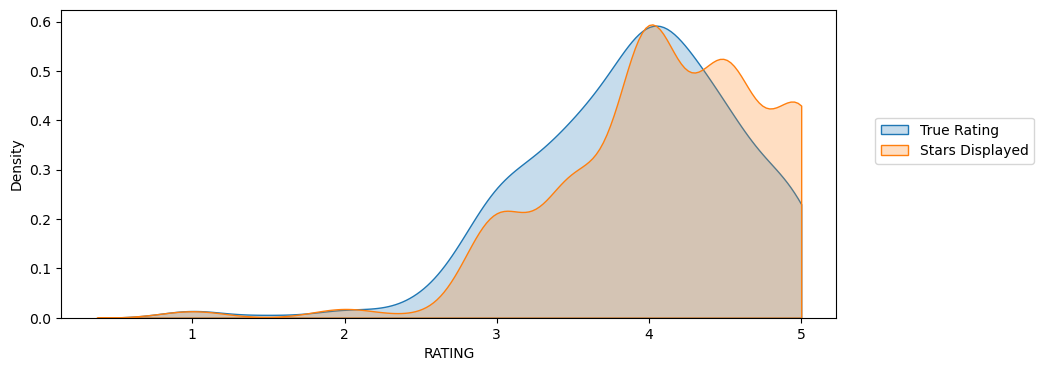

In [103]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=fan_reviewed,x="RATING",clip=[0,5],fill=True,label="True Rating")
sns.kdeplot(data=fan_reviewed,x="STARS",clip=[0,5],fill=True,label="Stars Displayed")
plt.legend(loc=(1.05,0.5))


In [114]:
fan_reviewed["STARS_DIFF"] = fan_reviewed["STARS"] - fan_reviewed["RATING"]
fan_reviewed["STARS_DIFF"] = fan_reviewed["STARS_DIFF"].round(2)

C:\Users\MY PC\AppData\Local\Temp\ipykernel_13464\3200031366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed["STARS_DIFF"] = fan_reviewed["STARS"] - fan_reviewed["RATING"]
C:\Users\MY PC\AppData\Local\Temp\ipykernel_13464\3200031366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed["STARS_DIFF"] = fan_reviewed["STARS_DIFF"].round(2)


<Axes: xlabel='STARS_DIFF', ylabel='count'>

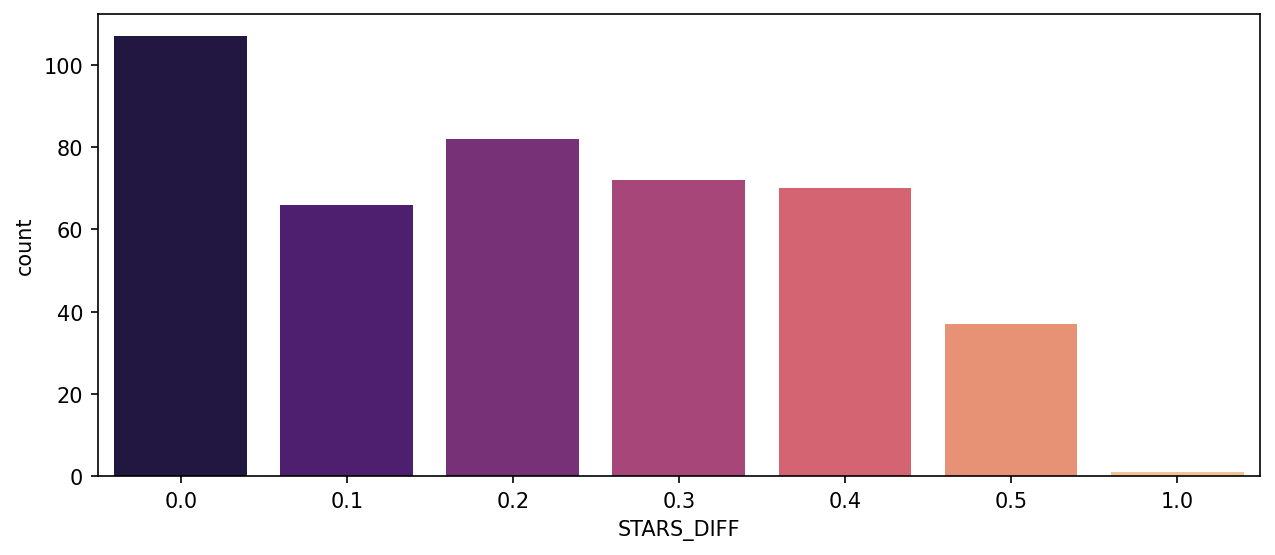

In [117]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=fan_reviewed,x="STARS_DIFF", palette="magma")

In [118]:
all_sites = pd.read_csv("../06-Capstone-Project/all_sites_scores.csv")
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


(0.0, 100.0)

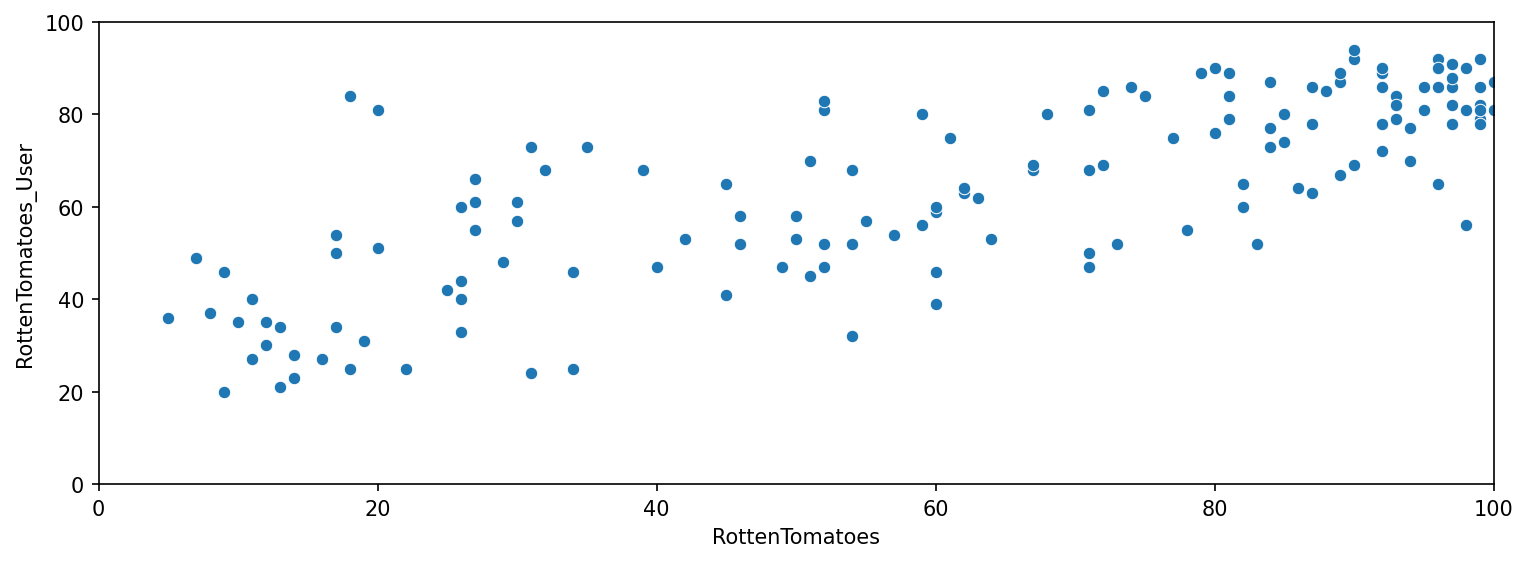

In [126]:
plt.figure(figsize=(12,4),dpi=150)

sns.scatterplot(x="RottenTomatoes",y="RottenTomatoes_User", data=all_sites)
plt.xlim(0,100)
plt.ylim(0,100)


In [127]:
all_sites["Rotten_Diff"] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]
all_sites["Rotten_Diff"].apply(abs).mean()

15.095890410958905

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

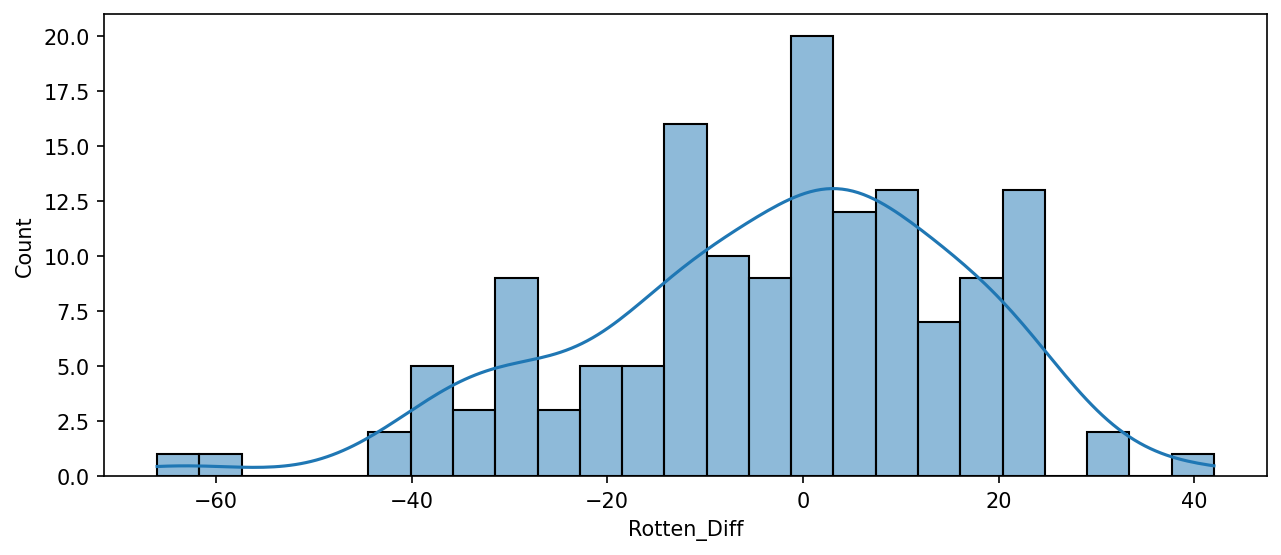

In [131]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x="Rotten_Diff",kde=True,bins=25)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

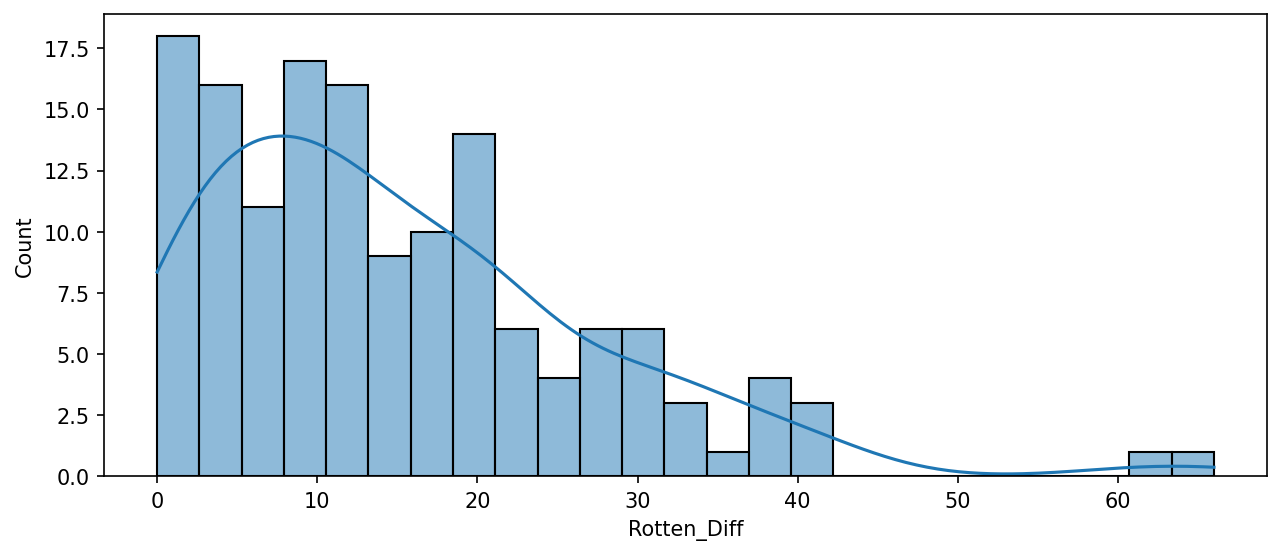

In [136]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(x=all_sites["Rotten_Diff"].apply(abs),kde=True,bins=25)

In [137]:
df = pd.merge(fandango, all_sites,on="FILM",how="inner")

In [138]:
df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9


In [139]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)


In [140]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [141]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [142]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [154]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

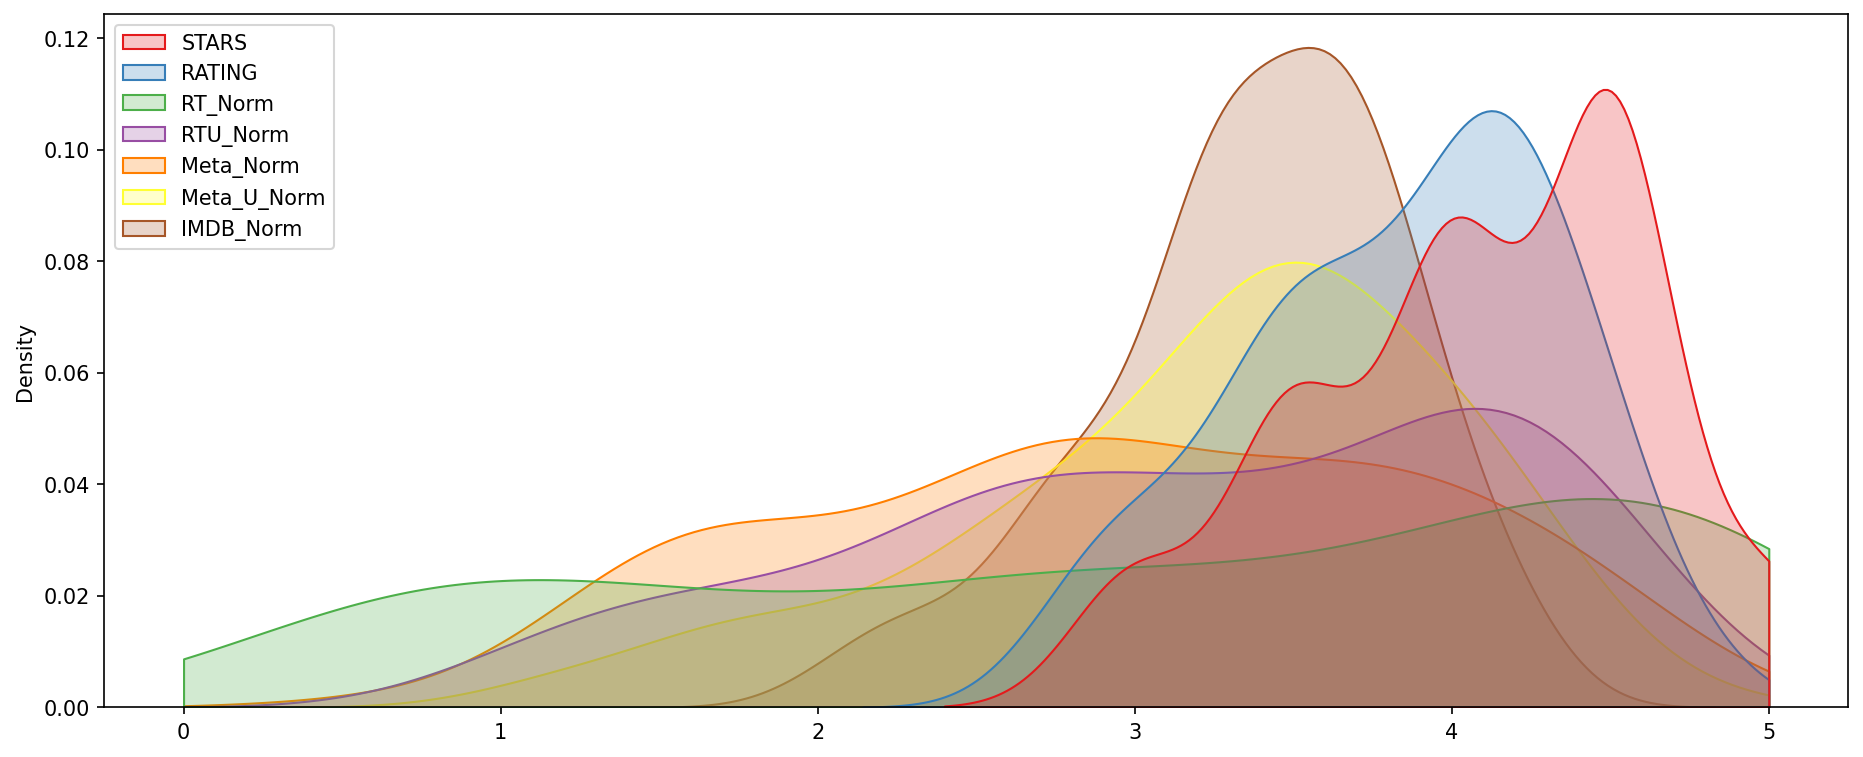

In [158]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")